<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/Dog-vs-Cat/blob/main/Kshitez_Pratap_Singh_Practical_3_14_09_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Program 3 :**

Classify Dog vs Cat using the Dataset and predict whether the new image is of Cat or Dog.


**What is SVM**

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:




![picture](https://drive.google.com/uc?export=view&id=15xSkehNUm48kJFe623R1o23F38vIWVUs)








                             Figure 3.1 :- Shows the SVM Image representation


##### **Importing the Kaggle.json API file**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

##### **Importing the Dataset directly from Kaggle**
##### This Datset contain 2 folders

##### 1.   Test
##### 2.   Train
##### Cat == 0, Dog == 1 (is the default folder)
##### The test dataset has 50 images of cat and dog
##### The train dataset has 500 images of cat and dog

In [ ]:
!kaggle datasets download -d razinw/dog-vs-cat

 98% 403M/412M [00:04<00:00, 68.8MB/s]
100% 412M/412M [00:04<00:00, 89.5MB/s]


##### **Unzipping the Kaggle folder**

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dog-vs-cat.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

##### **Importing Python Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import os
from sklearn.model_selection import GridSearchCV
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle

##### **Defining the Categories, that is 0 for cat and 1 for dog**

In [ ]:
# 0=Cat, 1=Dog
Categories=[0,1]
print("Type y to give categories or type 'n' to go with classification of Cats and Dogs");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f" Note:- If not drive Please upload all the {n} category images in google collab with the same names as given in categories")

Type y to give categories or type 'n' to go with classification of Cats and Dogs
y
Enter How Many types of Images do you want to classify
2
please enter 2 names
0
1
 Note:- If not drive Please upload all the 2 category images in google collab with the same names as given in categories


##### **Loading the Image in the form of Dataframe**

In [ ]:
flat_data_arr=[]
target_arr=[]
datadir="/content/dogvscat/train"
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_train=pd.DataFrame(flat_data)
df_train['Target']=target
df_train

loading... category : 0
loaded category:0 successfully
loading... category : 1
loaded category:1 successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.648076,0.614769,0.415114,0.659438,0.620424,0.426799,0.663744,0.623740,0.427893,0.672046,...,0.014853,0.021447,0.019892,0.019611,0.020942,0.020477,0.020919,0.021060,0.021712,0
1,0.732636,0.664794,0.526472,0.713561,0.653548,0.531221,0.703681,0.642924,0.518931,0.705308,...,0.536787,0.585750,0.459866,0.503175,0.569909,0.426239,0.519138,0.614591,0.392356,0
2,0.196789,0.195732,0.055629,0.167542,0.162752,0.053043,0.152464,0.159990,0.063507,0.263337,...,0.176335,0.161157,0.060966,0.249414,0.273797,0.078769,0.240994,0.253618,0.080356,0
3,0.404201,0.432200,0.461171,0.428513,0.457959,0.491325,0.471709,0.502329,0.544594,0.522094,...,0.033104,0.026011,0.037320,0.038147,0.038112,0.040135,0.054392,0.061506,0.045144,0
4,0.688019,0.457489,0.242720,0.685696,0.459415,0.241802,0.685633,0.460009,0.244560,0.680647,...,0.782082,0.550532,0.293801,0.805336,0.595526,0.350482,0.831282,0.637713,0.402474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.120200,0.104530,0.105641,0.119787,0.104733,0.108379,0.117532,0.104459,0.108306,0.117338,...,0.114192,0.100889,0.108869,0.116078,0.098951,0.113042,0.111115,0.101199,0.112179,1
496,0.493668,0.563629,0.340050,0.484413,0.559303,0.333820,0.464265,0.542863,0.326046,0.440463,...,0.267869,0.351633,0.130769,0.298761,0.373959,0.200877,0.249176,0.277378,0.115170,1
497,0.476254,0.463621,0.479793,0.461473,0.452437,0.472001,0.454560,0.436221,0.459392,0.679286,...,0.730667,0.748347,0.765000,0.710013,0.736705,0.757610,0.692558,0.727686,0.753699,1
498,0.003837,0.232370,0.371231,0.006492,0.233340,0.377459,0.006017,0.237773,0.380170,0.006234,...,0.852095,0.649988,0.213748,0.851109,0.657996,0.214531,0.850654,0.652000,0.208541,1


##### **Training Dataset**

In [ ]:
x1=df_train.iloc[0:150,:-1]
x2=df_train.iloc[250:400,:-1]
x_train_frame=[x1,x2]
x_train=pd.concat(x_train_frame)

y1=df_train.iloc[0:150,-1]
y2=df_train.iloc[250:400,-1]
y_train_frame=[y1,y2]
y_train=pd.concat(y_train_frame)
print('Splitted Successfully')

Splitted Successfully


In [ ]:
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.648076,0.614769,0.415114,0.659438,0.620424,0.426799,0.663744,0.623740,0.427893,0.672046,...,0.024839,0.014853,0.021447,0.019892,0.019611,0.020942,0.020477,0.020919,0.021060,0.021712
1,0.732636,0.664794,0.526472,0.713561,0.653548,0.531221,0.703681,0.642924,0.518931,0.705308,...,0.475724,0.536787,0.585750,0.459866,0.503175,0.569909,0.426239,0.519138,0.614591,0.392356
2,0.196789,0.195732,0.055629,0.167542,0.162752,0.053043,0.152464,0.159990,0.063507,0.263337,...,0.049454,0.176335,0.161157,0.060966,0.249414,0.273797,0.078769,0.240994,0.253618,0.080356
3,0.404201,0.432200,0.461171,0.428513,0.457959,0.491325,0.471709,0.502329,0.544594,0.522094,...,0.038137,0.033104,0.026011,0.037320,0.038147,0.038112,0.040135,0.054392,0.061506,0.045144
4,0.688019,0.457489,0.242720,0.685696,0.459415,0.241802,0.685633,0.460009,0.244560,0.680647,...,0.251039,0.782082,0.550532,0.293801,0.805336,0.595526,0.350482,0.831282,0.637713,0.402474


In [ ]:
y_train.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [ ]:
y_train.value_counts()

0    150
1    150
Name: Target, dtype: int64

##### **Testing Dataset**

In [ ]:
flat_data_arr=[]
target_arr=[]
datadir="/content/dogvscat/test"
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_test=pd.DataFrame(flat_data)
df_test['Target']=target
df_test

loading... category : 0
loaded category:0 successfully
loading... category : 1
loaded category:1 successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.511865,0.402446,0.385606,0.516552,0.409767,0.385017,0.522110,0.416224,0.388551,0.528761,...,0.086948,0.106888,0.202881,0.108415,0.128367,0.224211,0.109213,0.132459,0.228051,0
1,0.878404,0.691727,0.490816,0.886630,0.708834,0.519380,0.894621,0.721449,0.544925,0.903447,...,0.642859,0.473304,0.413982,0.640617,0.470587,0.413043,0.653789,0.475129,0.417264,0
2,0.453799,0.450092,0.448436,0.301804,0.292737,0.287958,0.307760,0.303885,0.303259,0.242654,...,0.274171,0.229854,0.216337,0.357724,0.297272,0.273108,0.458902,0.419296,0.407928,0
3,0.081088,0.106345,0.079042,0.082287,0.109040,0.081154,0.082006,0.116092,0.086456,0.088003,...,0.282549,0.241468,0.201288,0.242487,0.204613,0.167398,0.222483,0.178186,0.147079,0
4,0.897703,0.862408,0.795741,0.898634,0.862503,0.796101,0.903905,0.860798,0.796494,0.905000,...,0.823902,0.796451,0.824587,0.822901,0.795450,0.823644,0.821437,0.793986,0.824150,0
5,0.713610,0.780276,0.811649,0.712863,0.779543,0.810909,0.711048,0.777829,0.809114,0.698224,...,0.354487,0.351621,0.355340,0.312824,0.310000,0.306418,0.336267,0.332540,0.332015,0
6,0.282330,0.357176,0.180655,0.285012,0.361988,0.182602,0.278872,0.363546,0.176264,0.280160,...,0.365076,0.380616,0.366189,0.348230,0.364596,0.346096,0.271847,0.297597,0.251116,0
7,0.821071,0.792823,0.728201,0.808908,0.778486,0.702591,0.797412,0.762512,0.678836,0.810057,...,0.997669,0.866820,0.667118,0.997026,0.884842,0.696993,0.997156,0.903647,0.727734,0
8,0.384504,0.461371,0.470435,0.410100,0.472238,0.486859,0.424429,0.490746,0.492941,0.399162,...,0.133226,0.143816,0.205951,0.132405,0.148672,0.210708,0.130135,0.150189,0.213191,0
9,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,...,0.662009,0.623054,0.538007,0.660052,0.619554,0.540607,0.678460,0.647936,0.575731,0


In [ ]:
x_test=df_test.iloc[0:51,:-1]
y_test=df_test.iloc[0:51,-1]
print('Splitted Successfully')

Splitted Successfully


In [ ]:
x_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.511865,0.402446,0.385606,0.516552,0.409767,0.385017,0.522110,0.416224,0.388551,0.528761,...,0.214702,0.086948,0.106888,0.202881,0.108415,0.128367,0.224211,0.109213,0.132459,0.228051
1,0.878404,0.691727,0.490816,0.886630,0.708834,0.519380,0.894621,0.721449,0.544925,0.903447,...,0.451957,0.642859,0.473304,0.413982,0.640617,0.470587,0.413043,0.653789,0.475129,0.417264
2,0.453799,0.450092,0.448436,0.301804,0.292737,0.287958,0.307760,0.303885,0.303259,0.242654,...,0.253728,0.274171,0.229854,0.216337,0.357724,0.297272,0.273108,0.458902,0.419296,0.407928
3,0.081088,0.106345,0.079042,0.082287,0.109040,0.081154,0.082006,0.116092,0.086456,0.088003,...,0.199392,0.282549,0.241468,0.201288,0.242487,0.204613,0.167398,0.222483,0.178186,0.147079
4,0.897703,0.862408,0.795741,0.898634,0.862503,0.796101,0.903905,0.860798,0.796494,0.905000,...,0.827338,0.823902,0.796451,0.824587,0.822901,0.795450,0.823644,0.821437,0.793986,0.824150


In [ ]:
y_test.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

##### **Support Vector Machine (SVM) Classifier for image classification**

In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

##### **Predicting the Class [0,1]**

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1])

##### **Actual Values**

In [ ]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

##### **Accuracy**

In [ ]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 56.00000000000001% accurate


##### **Saving the Model in wb form using Pickle**

In [ ]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


##### **Loading the Model using Pickle and giving Image for Classification**

Enter URL of Image/content/d1_image_pred.jpg


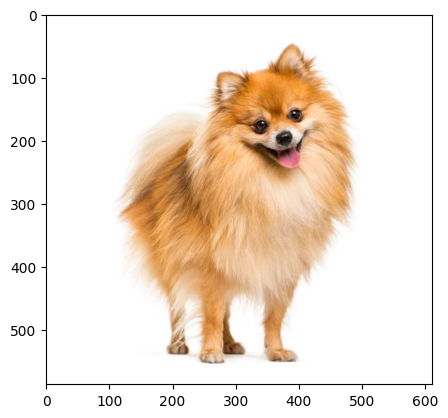

0 = 40.243233728805386%
1 = 59.75676627119461%
The predicted image is : 1
Is the image a 1 ?(y/n)
y
Thank you for your feedback


In [ ]:
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")

Enter URL of Image/content/c3.jpg


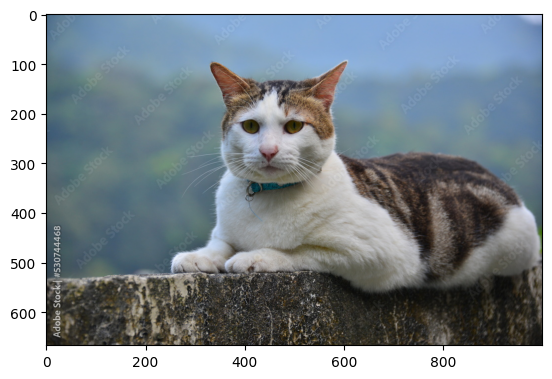

0 = 54.5612551987237%
1 = 45.438744801276286%
The predicted image is : 0
Is the image a 0 ?(y/n)
y
Thank you for your feedback


In [ ]:
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")